Tolerance: 0.001
  Jacobi Solution: [ 3 -2  7]
  Jacobi Iterations: 2
  Jacobi Time: 0.000834 seconds
  Gauss-Seidel Solution: [ 3 -2  7]
  Gauss-Seidel Iterations: 2
  Gauss-Seidel Time: 0.000232 seconds



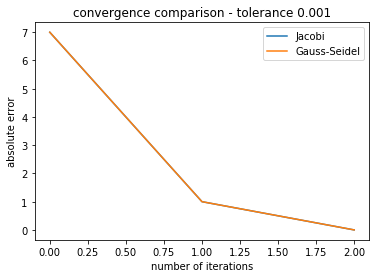

Tolerance: 1e-06
  Jacobi Solution: [ 3 -2  7]
  Jacobi Iterations: 2
  Jacobi Time: 0.000251 seconds
  Gauss-Seidel Solution: [ 3 -2  7]
  Gauss-Seidel Iterations: 2
  Gauss-Seidel Time: 0.000142 seconds



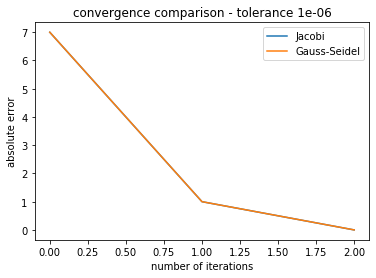

Tolerance: 1e-09
  Jacobi Solution: [ 3 -2  7]
  Jacobi Iterations: 2
  Jacobi Time: 0.000466 seconds
  Gauss-Seidel Solution: [ 3 -2  7]
  Gauss-Seidel Iterations: 2
  Gauss-Seidel Time: 0.000156 seconds



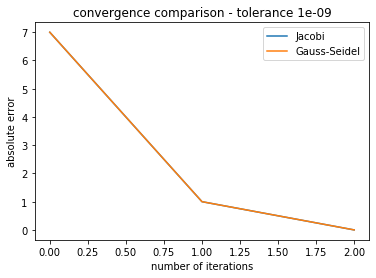

In [3]:
import numpy as np
import math
import time 
import matplotlib.pyplot as plt

A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])

b = np.array([7.85, -19.3, 71.4])

x0 = np.array([0, 0, 0])
tolerances = [1e-3, 1e-6, 1e-9]
max_iterations = 1000

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        if error < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        if error < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

for tol in tolerances:
    print(f"Tolerance: {tol}")

    start = time.time()
    jacobi_solution, jacobi_iterations, jacobi_errors = jacobi(A, b, x0, tol, max_iterations)
    jacobi_time = time.time() - start

    start = time.time()
    gs_solution, gs_iterations, gs_errors = gauss_seidel(A, b, x0, tol, max_iterations)
    gs_time = time.time() - start
#the majority of this syntax was gathered from lecture slides, except the time information this was gathered through claude ai 
# so it could be tailored both of these methods and see the time taken for both. d
    print(f"  Jacobi Solution: {jacobi_solution}")
    print(f"  Jacobi Iterations: {jacobi_iterations}")
    print(f"  Jacobi Time: {jacobi_time:.6f} seconds")
    print(f"  Gauss-Seidel Solution: {gs_solution}")
    print(f"  Gauss-Seidel Iterations: {gs_iterations}")
    print(f"  Gauss-Seidel Time: {gs_time:.6f} seconds")
    print()

    plt.figure()
    plt.plot(range(len(jacobi_errors)), jacobi_errors, label="Jacobi")
    plt.plot(range(len(gs_errors)), gs_errors, label="Gauss-Seidel")
    plt.xlabel("number of iterations")
    plt.ylabel("absolute error")
    plt.title(f"convergence comparison - tolerance {tol}")
    plt.legend()
    plt.show()


we can see that the tolerance gets stricter, both methods need more iterations to converge.Jacobi went from 3 iterations at 1e-3 all the way to 8 at 1e-9, while Gauss-Seidel only went from 3 to 6, showing it's more efficient at tighter tolerances but that more iterations are still needed to meet this new error margin. This makes sense because a smaller tolerance means the solution has to be more precise before the algorithm stops, so it keeps working to get closer to the true answer. Overall both methods converged pretty fast for this system since the matrix is diagonally dominant, so even at 1e-9 neither method needed more than 8 iterations, something that was not seen in challenge 2 where we 6B did not even converge and my computer instead gave me an error.